In [64]:
import numpy as np
np.random.seed(1024)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [65]:
# create some data
x=np.linspace(-1,1,200)

In [66]:
x

array([-1.        , -0.98994975, -0.9798995 , -0.96984925, -0.95979899,
       -0.94974874, -0.93969849, -0.92964824, -0.91959799, -0.90954774,
       -0.89949749, -0.88944724, -0.87939698, -0.86934673, -0.85929648,
       -0.84924623, -0.83919598, -0.82914573, -0.81909548, -0.80904523,
       -0.79899497, -0.78894472, -0.77889447, -0.76884422, -0.75879397,
       -0.74874372, -0.73869347, -0.72864322, -0.71859296, -0.70854271,
       -0.69849246, -0.68844221, -0.67839196, -0.66834171, -0.65829146,
       -0.64824121, -0.63819095, -0.6281407 , -0.61809045, -0.6080402 ,
       -0.59798995, -0.5879397 , -0.57788945, -0.5678392 , -0.55778894,
       -0.54773869, -0.53768844, -0.52763819, -0.51758794, -0.50753769,
       -0.49748744, -0.48743719, -0.47738693, -0.46733668, -0.45728643,
       -0.44723618, -0.43718593, -0.42713568, -0.41708543, -0.40703518,
       -0.39698492, -0.38693467, -0.37688442, -0.36683417, -0.35678392,
       -0.34673367, -0.33668342, -0.32663317, -0.31658291, -0.30

In [67]:
np.random.shuffle(x)  # randomize the data

In [68]:
x

array([-0.5678392 ,  0.73869347,  0.32663317, -0.49748744, -0.9798995 ,
        0.02512563, -0.89949749, -0.13567839, -0.31658291,  0.05527638,
        0.28643216,  0.98994975, -0.74874372, -0.24623116, -0.63819095,
        0.54773869, -0.41708543, -0.39698492,  0.12562814, -0.46733668,
        0.11557789, -0.01507538, -0.25628141, -0.12562814, -0.88944724,
       -0.04522613,  0.10552764,  0.68844221, -0.42713568, -0.44723618,
       -0.26633166,  0.50753769, -0.47738693, -0.50753769, -0.92964824,
        1.        , -0.27638191,  0.88944724,  0.41708543,  0.59798995,
       -0.78894472, -0.11557789, -0.5879397 , -0.93969849, -0.20603015,
        0.5879397 ,  0.77889447,  0.29648241, -0.55778894, -0.14572864,
       -0.64824121,  0.1758794 ,  0.96984925, -0.2160804 , -0.18592965,
       -0.66834171,  0.42713568,  0.80904523,  0.70854271,  0.53768844,
       -0.70854271, -0.79899497, -1.        , -0.82914573,  0.03517588,
        0.36683417,  0.31658291,  0.26633166,  0.5678392 ,  0.57

In [69]:
y=x*0.5+2+np.random.normal(0,0.05,(200,))

In [70]:
y

array([1.7413356 , 2.35851828, 2.13763469, 1.74354522, 1.57182804,
       1.94274225, 1.59431969, 2.00575977, 1.85964225, 1.98183198,
       2.20190786, 2.56038202, 1.66330694, 1.80936882, 1.75967643,
       2.22101034, 1.6797668 , 1.80058413, 2.08834239, 1.87779848,
       1.99377204, 1.97199346, 1.84171274, 1.97674533, 1.49843687,
       2.02965967, 2.09794254, 2.35346287, 1.70478628, 1.73557694,
       1.92170323, 2.32095591, 1.7904154 , 1.79760575, 1.57473572,
       2.45411408, 1.86491875, 2.47065744, 2.3061312 , 2.31294491,
       1.45990947, 1.92837905, 1.69408871, 1.52022552, 1.84876961,
       2.31687939, 2.35054523, 2.12208778, 1.69923246, 1.97084962,
       1.69855081, 1.94611868, 2.44867487, 1.859172  , 1.83516574,
       1.67273554, 2.24685722, 2.47098148, 2.41719808, 2.26435189,
       1.64997384, 1.64349362, 1.53334118, 1.54544173, 1.96037504,
       2.15063765, 2.10722042, 2.08633459, 2.24299801, 2.2821183 ,
       2.1283859 , 1.77737721, 1.92939289, 2.24624891, 1.66485

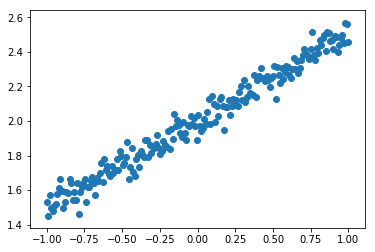

In [71]:
# plot data
plt.scatter(x,y)

In [72]:
x_train,y_train=x[:160],y[:160]  # first 160 data points

In [73]:
x_train

array([-0.5678392 ,  0.73869347,  0.32663317, -0.49748744, -0.9798995 ,
        0.02512563, -0.89949749, -0.13567839, -0.31658291,  0.05527638,
        0.28643216,  0.98994975, -0.74874372, -0.24623116, -0.63819095,
        0.54773869, -0.41708543, -0.39698492,  0.12562814, -0.46733668,
        0.11557789, -0.01507538, -0.25628141, -0.12562814, -0.88944724,
       -0.04522613,  0.10552764,  0.68844221, -0.42713568, -0.44723618,
       -0.26633166,  0.50753769, -0.47738693, -0.50753769, -0.92964824,
        1.        , -0.27638191,  0.88944724,  0.41708543,  0.59798995,
       -0.78894472, -0.11557789, -0.5879397 , -0.93969849, -0.20603015,
        0.5879397 ,  0.77889447,  0.29648241, -0.55778894, -0.14572864,
       -0.64824121,  0.1758794 ,  0.96984925, -0.2160804 , -0.18592965,
       -0.66834171,  0.42713568,  0.80904523,  0.70854271,  0.53768844,
       -0.70854271, -0.79899497, -1.        , -0.82914573,  0.03517588,
        0.36683417,  0.31658291,  0.26633166,  0.5678392 ,  0.57

In [74]:
y_train

array([1.7413356 , 2.35851828, 2.13763469, 1.74354522, 1.57182804,
       1.94274225, 1.59431969, 2.00575977, 1.85964225, 1.98183198,
       2.20190786, 2.56038202, 1.66330694, 1.80936882, 1.75967643,
       2.22101034, 1.6797668 , 1.80058413, 2.08834239, 1.87779848,
       1.99377204, 1.97199346, 1.84171274, 1.97674533, 1.49843687,
       2.02965967, 2.09794254, 2.35346287, 1.70478628, 1.73557694,
       1.92170323, 2.32095591, 1.7904154 , 1.79760575, 1.57473572,
       2.45411408, 1.86491875, 2.47065744, 2.3061312 , 2.31294491,
       1.45990947, 1.92837905, 1.69408871, 1.52022552, 1.84876961,
       2.31687939, 2.35054523, 2.12208778, 1.69923246, 1.97084962,
       1.69855081, 1.94611868, 2.44867487, 1.859172  , 1.83516574,
       1.67273554, 2.24685722, 2.47098148, 2.41719808, 2.26435189,
       1.64997384, 1.64349362, 1.53334118, 1.54544173, 1.96037504,
       2.15063765, 2.10722042, 2.08633459, 2.24299801, 2.2821183 ,
       2.1283859 , 1.77737721, 1.92939289, 2.24624891, 1.66485

In [75]:
x_test,y_test=x[160:],y[160:]  # last 40 data points

In [76]:
x_test

array([ 0.44723618,  0.40703518,  0.90954774, -0.09547739, -0.73869347,
       -0.59798995,  0.85929648,  0.43718593,  0.48743719, -0.29648241,
       -0.94974874, -0.2361809 , -0.52763819, -0.38693467, -0.69849246,
       -0.86934673, -0.51758794, -0.80904523, -0.72864322,  0.82914573,
       -0.6281407 ,  0.76884422, -0.30653266, -0.40703518, -0.81909548,
       -0.34673367, -0.90954774,  0.71859296, -0.76884422, -0.03517588,
        0.78894472, -0.32663317, -0.67839196, -0.22613065,  0.9798995 ,
       -0.10552764,  0.01507538, -0.02512563,  0.45728643,  0.87939698])

In [77]:
y_test

array([2.22904333, 2.26062375, 2.4928463 , 1.99433403, 1.52979368,
       1.73904776, 2.51424277, 2.24446519, 2.25081401, 1.85115509,
       1.50520395, 1.82740574, 1.71662137, 1.73273942, 1.67644409,
       1.5879359 , 1.82696402, 1.54487431, 1.61981433, 2.47831741,
       1.64959444, 2.38185357, 1.81363778, 1.77743442, 1.58681807,
       1.88763315, 1.66262479, 2.39000618, 1.62028277, 1.98196465,
       2.42154073, 1.78943716, 1.57267187, 1.88230083, 2.56908523,
       1.90737844, 1.97272888, 2.01540678, 2.25976668, 2.46068462])

In [78]:
# build a neural network from the 1st layer to the last layer
model=Sequential()
model.add(Dense(units=1,input_dim=1))

In [79]:
# choose loss function and optimizing method
model.compile(loss='mse',optimizer="sgd")

In [80]:
# training
print("Training-----------")
for step in range(301):
    cost=model.train_on_batch(x_train,y_train)
    if(step%100==0):
        print("train cost: ", cost)


Training-----------
train cost:  5.5877795
train cost:  0.42290106
train cost:  0.09776405
train cost:  0.028207283


In [81]:
# test
print("\nTesting-----------")
cost=model.evaluate(x_test,y_test,batch_size=40)
print("test cost: ",cost)
w,b=model.layers[0].get_weights()
print('Weights = ',w,'\nbiases = ',b)


Testing-----------
40/40 [==============================] - 0s 472us/step
test cost:  0.03847571834921837
Weights =  [[0.22128722]] 
biases =  [2.0075338]


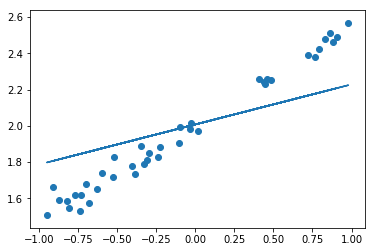

In [82]:
# plotting the prediction
y_pred=model.predict(x_test)
y_pred
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)